In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("D:\\Machine Learning\\Data\\carprices.csv")
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


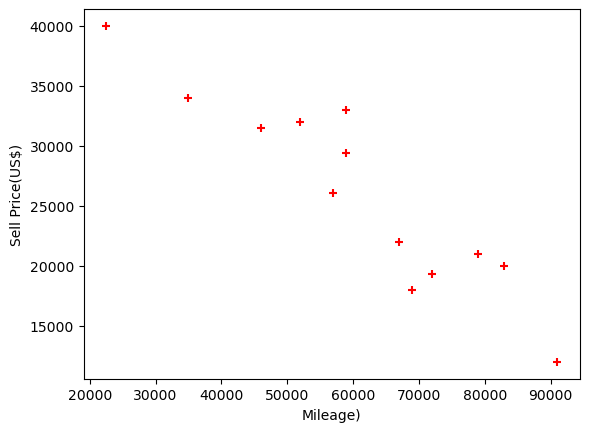

In [3]:
plt.xlabel('Mileage)')
plt.ylabel('Sell Price(US$)')
plt.scatter(df["Mileage"], df["Sell Price($)"], color='red', marker='+')
plt.show()

In [4]:
dummies = pd.get_dummies(df[['Car Model']], dtype=int)
dummies

,Car Model_Audi A5,Car Model_BMW X5,Car Model_Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [5]:
merged = pd.concat([df, dummies], axis='columns')
merged

,Car Model,Mileage,Sell Price($),Age(yrs),Car Model_Audi A5,Car Model_BMW X5,Car Model_Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [6]:
final= merged.drop(['Car Model', 'Car Model_Audi A5'], axis = 'columns')
final

,Mileage,Sell Price($),Age(yrs),Car Model_BMW X5,Car Model_Mercedez Benz C class
0,69000,18000,6,1,0
1,35000,34000,3,1,0
2,57000,26100,5,1,0
3,22500,40000,2,1,0
4,46000,31500,4,1,0
5,59000,29400,5,0,0
6,52000,32000,5,0,0
7,72000,19300,6,0,0
8,91000,12000,8,0,0
9,67000,22000,6,0,1


In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [10]:
x = final.drop('Sell Price($)', axis = 'columns')
x

,Mileage,Age(yrs),Car Model_BMW X5,Car Model_Mercedez Benz C class
0,69000,6,1,0
1,35000,3,1,0
2,57000,5,1,0
3,22500,2,1,0
4,46000,4,1,0
5,59000,5,0,0
6,52000,5,0,0
7,72000,6,0,0
8,91000,8,0,0
9,67000,6,0,1


In [13]:
y = final[['Sell Price($)']]
y

,Sell Price($)
0,18000
1,34000
2,26100
3,40000
4,31500
5,29400
6,32000
7,19300
8,12000
9,22000


In [14]:
model.fit(x,y)

LinearRegression()

In [15]:
#Predicting price of 4yr old Mercedez Benz with mileage 45000
model.predict([[45000, 4, 0, 1]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[36991.31721061]])

In [16]:
#Predicting price of 7yr old BMW X5 with mileage 86000
model.predict([[86000, 7, 1, 0]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[11080.74313219]])

In [18]:
model.score(x,y)

0.9417050937281082